## Data Mining
## Lab 3: Visualization
## 18110053 - Nguyễn Quốc Bảo

In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
sns.set()
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

pd.set_option('max.columns',100)
pd.set_option('max.rows',500)

# Data description

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* Island - Island near Palmer Station where samples were collected.-(Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill_length_mm: length of the dorsal ridge of a bird's bill - culmen length (mm)
* bill_depth_mm: depth of the dorsal ridge of a bird's bill-culmen depth (mm)
* flipper_length_mm: Length of flipper - flipper length (mm)
* body_mass_g: body mass (g) - Mass of body
* sex: penguin sex - code for the sex of an animal

In [58]:
data = sns.load_dataset('penguins')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Nhận xét:
* Có vài missing value trong các {Culmen length,Culmen Depth,Filpper Length,Body mass,sex}
* Có 4 floats, 3 objects

In [12]:
def find_missing_percent(data , showresult = True):
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        missinginfo = {"ColumnName" : col, "TotalMissingVals" : sum_miss_val, "PercentMissing" : percent_miss_val}
        miss_df = miss_df.append(missinginfo, ignore_index = True)
    
    miss_df = miss_df[miss_df["PercentMissing"] > 0.0]
    miss_df = miss_df.reset_index(drop = True)
    miss_features = miss_df["ColumnName"].values
    if(showresult):
        print(data.shape)
        display(data.head())
        display(miss_df)
    return miss_df

miss_df = find_missing_percent(data)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,ColumnName,TotalMissingVals,PercentMissing
0,bill_length_mm,2.0,0.58
1,bill_depth_mm,2.0,0.58
2,flipper_length_mm,2.0,0.58
3,body_mass_g,2.0,0.58
4,sex,11.0,3.20


In [13]:
adelie_sp =  data[data['species']=='Adelie']
adelie_sp.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [14]:
gentoo_sp =  data[data['species']=='Gentoo']
gentoo_sp.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [15]:
chinstrap_sp =  data[data['species']=='Chinstrap']
chinstrap_sp.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


Nhận xét:
1. Loài Gentoo trung bình nặng hơn (5076g) so với cả Adelie và Chistrap, lần lượt là 3700g và 3733g. Gentoo> Chinstrap> Adelie
2. Theo dữ liệu, Gentoo có Chiều dài Flipper dài hơn là 217mm, còn Adelie và Chinstrap có 189mm và 195mm. Gentoo > Chinstrap > Adelie
3. Một con Chinstrap trung bình có Bill / Beak dài hơn 48mm (Chiều dài Culmen) và các loài khác có 47mm đối với Gentoo và 38mm đối với Adelie Chinstrap> Gentoo> Adelie
4. Chinstrap trung bình và Adele đều có rãnh Bill rộng hơn 18mm (độ sâu Culmen) hơn Gentoo là 14mm Chinstrap == Gentoo> Adelie

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

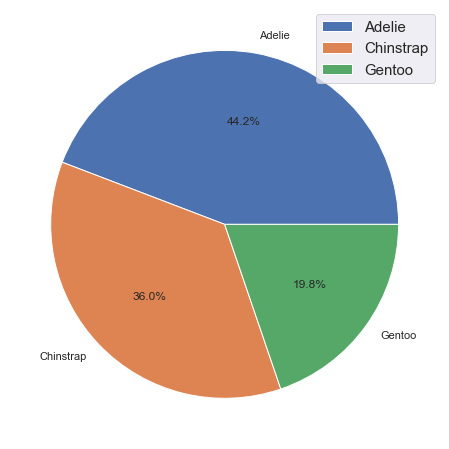

In [46]:
display(data.species.value_counts())
ls_count = data.species.value_counts()
plt.figure(figsize=(8,8))
plt.pie(ls_count, labels=data.species.unique(), autopct='%1.1f%%')
plt.legend(fontsize=15)
plt.show()

Nhận xét:
    Trong tập dữ liệu này số lượng loài Adelie chiếm đa số 44.2% so với Chinstrap và Gentoo lần lượt là 36% và Gentoo


Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

[Text(0.5, 1.0, 'Species in all island')]

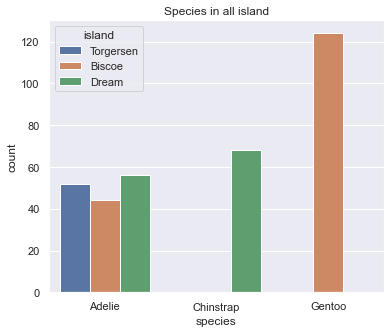

In [81]:
display(data.island.value_counts())
plt.figure(figsize=(6,5))
sns.countplot( x='species' ,hue='island', data = data).set(title='Species in all island')

Nhận xét:
* Số lượng mẫu thu thập tại 3 hòn đảo Biscoe, Dream và Torgersen lần lượt là 168, 124 và 52
* Nhưng Adelie thì lại phổ biến ở cả 3 hòn đảo
* Còn Chinstrap chỉ có ở Dream và Gentoo chỉ có ở Biscoe

[Text(0.5, 1.0, 'Flipper Length in all species')]

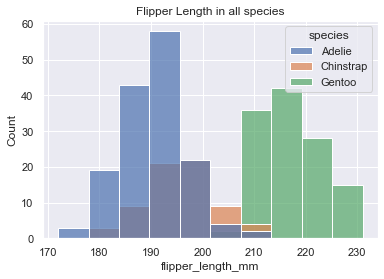

In [66]:
sns.histplot(data,x='flipper_length_mm',hue='species',alpha=.7).set(title='Flipper Length in all species')

[Text(0.5, 1.0, 'Flipper Length in all species')]

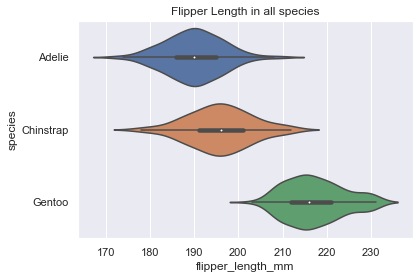

In [65]:
sns.violinplot(y=data['species'],x=data['flipper_length_mm']).set(title='Flipper Length in all species')

Nhận xét:
* Nếu chiều dài lồng lộn của chim cánh cụt nằm trong khoảng 210 - 230 mm thì nhiều khả năng nó là Gentoo.
* Khi chiều dài của chim cánh cụt nằm trong khoảng 200 - 215 mm, nó có thể là loài Chinstrap.
* Nếu chiều dài của một con chim cánh cụt nằm trong khoảng từ 172 đến 200 thì nó có khả năng là Adelie

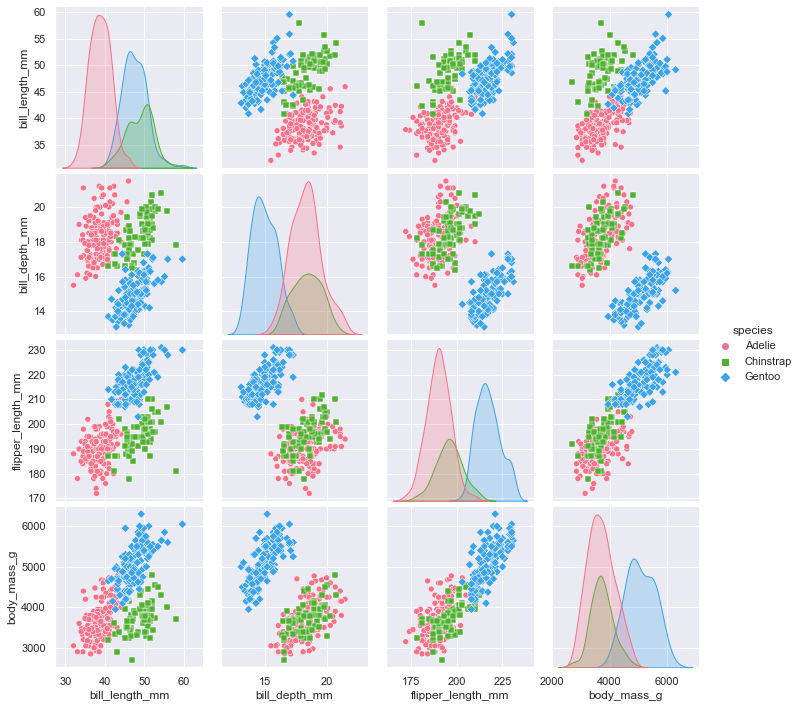

In [9]:
sns.pairplot(data,hue='species',palette='husl',markers=['o','s','D'])

Nhận xét:

* Chúng ta có thể thấy rằng khối lượng cơ thể và chiều dài Flipper có mối tương quan thuận, cho thấy Gentoos có chiều dài Flipper dài hơn và khối lượng cơ thể cũng nặng hơn.
* Chiều dài và Flipper cũng tương quan thuận, adelies có chân chèo ngắn hơn và chiều dài ống cống ngắn hơn.

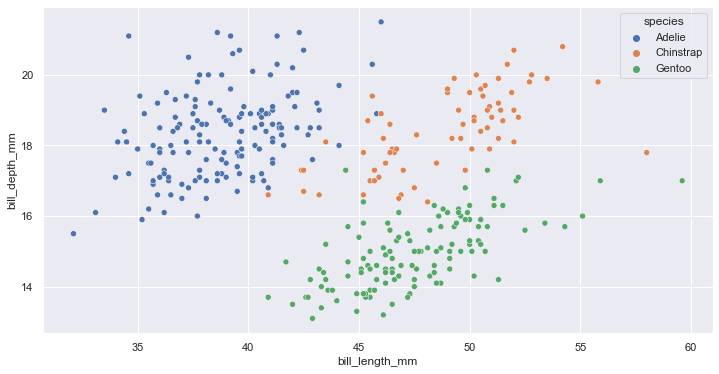

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='bill_length_mm',y='bill_depth_mm',hue='species')

Nhận xét:
* Những con chim cánh cụt có chiều sâu từ 16mm trở lên và có chiều dài dưới 40mm nhiều khả năng là Adelie.
* Ngoài ra, những con chim cánh cụt có độ sâu dưới 16mm, những con có chiều dài  hơn 40mm có nhiều khả năng là một con gentoo.
* Chim cánh cụt có độ sâu từ 16 mm trở lên, những con có chiều dài cống hơn 40 mm thì giống Chinstrap hơn.

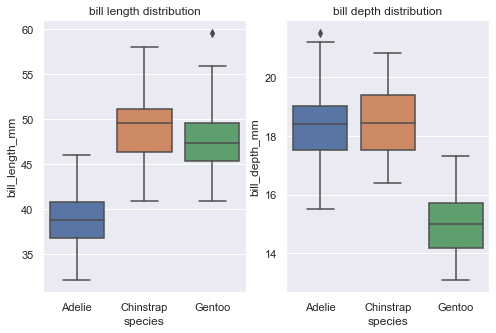

In [84]:
fig, axes = plt.subplots(1,2, figsize=(8,5))
sns.boxplot(data=data, x="species", y="bill_length_mm", ax=axes[0]).set(title='bill length distribution')
sns.boxplot(data=data, x="species", y="bill_depth_mm", ax=axes[1]).set(title='bill depth distribution')
plt.show()

Nhận xét:
* Chiều dài và chiều sâu của mỗi loài có phân bố khá tốt
* Theo như dữ liệu quan sát được, chiều dài chỉ có loài Gentoo xuất hiện giá trị ngoại lai
* Chiều sâu chỉ có loài Adelie xuất hiện giá trị ngoại lai  